# Saudi Marathon EDA

##### Performing Exploratory Data Analytics of Ultra Marathon Data set focusing on data that relevent to Saudi

## Importing Libraries

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Loading of the Dataset

In [103]:
df = pd.read_csv(r'D:/Data_Analytics/datasets/TWO_CENTURIES_OF_UM_RACES.csv', low_memory=False)

## Checking the information of the dataset


In [104]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [105]:
df.shape

(7461195, 13)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


## Selecting Marathons That happened in Saudi

In [107]:
df = df[df['Event name'].str.contains("\(KSA\)")]

In [108]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
1034660,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,6:35:00 h,33° Rima,FRA,1974.0,M,M40,7.595,84859
1034661,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,6:43:00 h,NaN,FRA,1968.0,F,W45,7.444,235243
1034662,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,6:56:00 h,NaN,SUI,1986.0,M,M23,7.212,494704
1034663,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,7:53:00 h,NaN,FRA,1961.0,M,M55,6.342,355314
1034664,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,8:07:00 h,Jeddah Road Runners,GBR,1962.0,M,M50,6.16,296295


## Data Cleaning and Tranformation



In [109]:
# How many nulls we have?
df.isnull().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete club                 212
Athlete country                0
Athlete year of birth         54
Athlete gender                 0
Athlete age category          54
Athlete average speed          0
Athlete ID                     0
dtype: int64

In [110]:
# Data types?
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [111]:
# Adding column that i am going to use later on
# Age of the athlete at the time of the event

df['athlete_age'] = df['Year of event'] - df['Athlete year of birth']

In [112]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
1034660,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,6:35:00 h,33° Rima,FRA,1974.0,M,M40,7.595,84859,42.0
1034661,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,6:43:00 h,NaN,FRA,1968.0,F,W45,7.444,235243,48.0
1034662,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,6:56:00 h,NaN,SUI,1986.0,M,M23,7.212,494704,30.0
1034663,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,7:53:00 h,NaN,FRA,1961.0,M,M55,6.342,355314,55.0
1034664,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,8:07:00 h,Jeddah Road Runners,GBR,1962.0,M,M50,6.16,296295,54.0


In [113]:
df.describe()

,Year of event,Event number of finishers,Athlete year of birth,Athlete ID,athlete_age
count,216.000000,216.000000,162.000000,216.000000,162.000000
mean,2020.759259,61.898148,1978.771605,706053.138889,41.580247
std,1.432970,25.948944,9.942865,305533.251498,9.931272
min,2016.000000,2.000000,1944.000000,1758.000000,23.000000
25%,2020.000000,35.000000,1971.000000,544325.000000,33.000000
50%,2020.000000,66.000000,1980.000000,829088.500000,41.000000
75%,2022.000000,86.000000,1987.000000,966872.250000,49.000000
max,2022.000000,86.000000,1997.000000,966968.000000,78.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 1034660 to 3239289
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year of event              216 non-null    int64  
 1   Event dates                216 non-null    object 
 2   Event name                 216 non-null    object 
 3   Event distance/length      216 non-null    object 
 4   Event number of finishers  216 non-null    int64  
 5   Athlete performance        216 non-null    object 
 6   Athlete club               4 non-null      object 
 7   Athlete country            216 non-null    object 
 8   Athlete year of birth      162 non-null    float64
 9   Athlete gender             216 non-null    object 
 10  Athlete age category       162 non-null    object 
 11  Athlete average speed      216 non-null    object 
 12  Athlete ID                 216 non-null    int64  
 13  athlete_age                162 non-null    fl

In [115]:
# Checking if every thing make sense

df.nunique()

Year of event                  4
Event dates                    4
Event name                     5
Event distance/length          4
Event number of finishers      6
Athlete performance          210
Athlete club                   3
Athlete country               40
Athlete year of birth         38
Athlete gender                 2
Athlete age category          15
Athlete average speed        202
Athlete ID                   201
athlete_age                   40
dtype: int64

In [116]:
# What are the marathons that happend in saudi
df['Event name'].unique()

array(['Hejaz Ultra 50 (KSA)', 'EcoTrail AlUla 83 km (KSA)',
       'EcoTrail AlUla 45 km (KSA)', 'Last Hejazi Standing (KSA)',
       'EcoTrail AlUla 50 km (KSA)'], dtype=object)

In [117]:
# In which years?

df['Year of event'].unique()

array([2016, 2020, 2021, 2022], dtype=int64)

### Taking Only the columns that i need

In [118]:
df.columns

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete club',
       'Athlete country', 'Athlete year of birth', 'Athlete gender',
       'Athlete age category', 'Athlete average speed', 'Athlete ID',
       'athlete_age'],
      dtype='object')

In [119]:
df.drop(['Athlete country','Athlete club', 'Athlete year of birth', 'Athlete age category'], axis=1, inplace=True)

In [120]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
1034660,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,6:35:00 h,M,7.595,84859,42.0
1034661,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,6:43:00 h,F,7.444,235243,48.0
1034662,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,6:56:00 h,M,7.212,494704,30.0
1034663,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,7:53:00 h,M,6.342,355314,55.0
1034664,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,8:07:00 h,M,6.16,296295,54.0


### Renaming the columnms to have some consistency

In [121]:
df.columns

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete gender',
       'Athlete average speed', 'Athlete ID', 'athlete_age'],
      dtype='object')

In [122]:
df = df.rename(columns={
    'Year of event': 'year',
    'Event name': 'marathon_name',
    'Event dates': 'marathon_date',
    'Event distance/length': 'marathon_length',
    'Event number of finishers': 'marathon_number_of_finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete gender': 'athlete_gender',
    'Athlete average speed': 'athlete_average_speed',
    'Athlete ID': 'athlete_id',
})

In [123]:
df.head()

,year,marathon_date,marathon_name,marathon_length,marathon_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
1034660,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,6:35:00 h,M,7.595,84859,42.0
1034661,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,6:43:00 h,F,7.444,235243,48.0
1034662,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,6:56:00 h,M,7.212,494704,30.0
1034663,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,7:53:00 h,M,6.342,355314,55.0
1034664,2016,15.10.2016,Hejaz Ultra 50 (KSA),50km,10,8:07:00 h,M,6.16,296295,54.0


### Dropping nulls 

In [124]:
df.isnull().sum()

year                             0
marathon_date                    0
marathon_name                    0
marathon_length                  0
marathon_number_of_finishers     0
athlete_performance              0
athlete_gender                   0
athlete_average_speed            0
athlete_id                       0
athlete_age                     54
dtype: int64

In [125]:
df.dropna(inplace=True)

In [126]:
df.dtypes

year                              int64
marathon_date                    object
marathon_name                    object
marathon_length                  object
marathon_number_of_finishers      int64
athlete_performance              object
athlete_gender                   object
athlete_average_speed            object
athlete_id                        int64
athlete_age                     float64
dtype: object

In [127]:
df['marathon_date'] = pd.to_datetime(df['marathon_date'], dayfirst=True).dt.date

In [128]:
df['marathon_date'].unique()

array([datetime.date(2016, 10, 15), datetime.date(2020, 2, 8),
       datetime.date(2021, 11, 12), datetime.date(2022, 3, 19)],
      dtype=object)

In [129]:
df.dtypes

year                              int64
marathon_date                    object
marathon_name                    object
marathon_length                  object
marathon_number_of_finishers      int64
athlete_performance              object
athlete_gender                   object
athlete_average_speed            object
athlete_id                        int64
athlete_age                     float64
dtype: object

####  Removing the 'h' from the athlete performance

In [130]:
df['athlete_performance'] = df['athlete_performance'].str.split(' ').str.get(0)

In [131]:
df['athlete_age'] = df['athlete_age'].astype(int)

In [132]:
df['marathon_name']

1034660          Hejaz Ultra 50 (KSA)
1034661          Hejaz Ultra 50 (KSA)
1034662          Hejaz Ultra 50 (KSA)
1034663          Hejaz Ultra 50 (KSA)
1034664          Hejaz Ultra 50 (KSA)
                      ...            
3239282    EcoTrail AlUla 83 km (KSA)
3239284    EcoTrail AlUla 83 km (KSA)
3239285    EcoTrail AlUla 83 km (KSA)
3239287    EcoTrail AlUla 83 km (KSA)
3239288    EcoTrail AlUla 83 km (KSA)
Name: marathon_name, Length: 162, dtype: object

### Removing (KSA)
##### all of them from the same country

In [133]:
df['marathon_name'] = df['marathon_name'].str.split('\s*\(', expand=True)[0]

In [134]:
df['athlete_average_speed'] = df['athlete_average_speed'].astype(float)

In [135]:
df.head(10)

,year,marathon_date,marathon_name,marathon_length,marathon_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
1034660,2016,2016-10-15,Hejaz Ultra 50,50km,10,6:35:00,M,7.595,84859,42
1034661,2016,2016-10-15,Hejaz Ultra 50,50km,10,6:43:00,F,7.444,235243,48
1034662,2016,2016-10-15,Hejaz Ultra 50,50km,10,6:56:00,M,7.212,494704,30
1034663,2016,2016-10-15,Hejaz Ultra 50,50km,10,7:53:00,M,6.342,355314,55
1034664,2016,2016-10-15,Hejaz Ultra 50,50km,10,8:07:00,M,6.160,296295,54
1034665,2016,2016-10-15,Hejaz Ultra 50,50km,10,8:27:00,M,5.917,494705,32
1034666,2016,2016-10-15,Hejaz Ultra 50,50km,10,8:54:00,M,5.618,494706,44
1034667,2016,2016-10-15,Hejaz Ultra 50,50km,10,9:14:00,M,5.415,494707,37
1034668,2016,2016-10-15,Hejaz Ultra 50,50km,10,9:41:00,F,5.164,156311,46
1034669,2016,2016-10-15,Hejaz Ultra 50,50km,10,9:41:00,M,5.164,426442,43


In [136]:
# reordering the columns
df = df[['year','marathon_date', 'marathon_name', 'marathon_length', 'marathon_number_of_finishers', 'athlete_id', 'athlete_gender',
       'athlete_age', 'athlete_performance', 'athlete_average_speed']]

In [137]:
df.head()

,year,marathon_date,marathon_name,marathon_length,marathon_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
1034660,2016,2016-10-15,Hejaz Ultra 50,50km,10,84859,M,42,6:35:00,7.595
1034661,2016,2016-10-15,Hejaz Ultra 50,50km,10,235243,F,48,6:43:00,7.444
1034662,2016,2016-10-15,Hejaz Ultra 50,50km,10,494704,M,30,6:56:00,7.212
1034663,2016,2016-10-15,Hejaz Ultra 50,50km,10,355314,M,55,7:53:00,6.342
1034664,2016,2016-10-15,Hejaz Ultra 50,50km,10,296295,M,54,8:07:00,6.160


In [138]:
df.describe()

,year,marathon_number_of_finishers,athlete_id,athlete_age,athlete_average_speed
count,162.000000,162.000000,162.00000,162.000000,162.000000
mean,2020.351852,62.265432,629731.62963,41.580247,7.834617
std,1.438047,28.991494,307046.32090,9.931272,1.469942
min,2016.000000,2.000000,1777.00000,23.000000,5.164000
25%,2020.000000,35.000000,385127.75000,33.000000,6.832500
50%,2020.000000,86.000000,829068.50000,41.000000,7.535000
75%,2022.000000,86.000000,829103.75000,49.000000,8.545000
max,2022.000000,86.000000,966965.00000,78.000000,14.709000


<Axes: xlabel='marathon_length', ylabel='Count'>

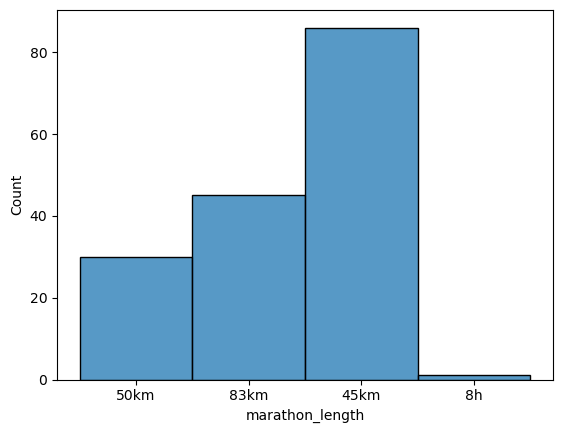

In [139]:
sns.histplot(df['marathon_length'])

In [140]:
### Maybe the 8h by accident so lets remove it

In [141]:
df.drop(df[df['marathon_length'] == '8h'].index, inplace=True)

<Axes: xlabel='marathon_length', ylabel='Count'>

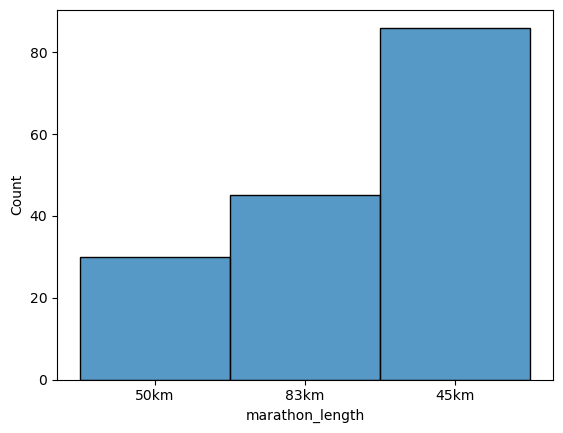

In [142]:
# What is the Marathon length that the Vast Majority Competed in?
sns.histplot(df['marathon_length'])

In [143]:
# Difference in speed for each marathon length male to female? 
df.groupby(['marathon_length', 'athlete_gender'])['athlete_average_speed'].mean()

marathon_length  athlete_gender
45km             F                 7.373389
                 M                 8.171029
50km             F                 7.830500
                 M                 7.414182
83km             F                 7.918143
                 M                 7.701947
Name: athlete_average_speed, dtype: float64

### Wow Females have higher average speeed Than Males when it comes to longer Marathons
##### I guess having a stronger physique is not enough, you need a good strategy, mental toughness and maybe body weight also plays in the equation.

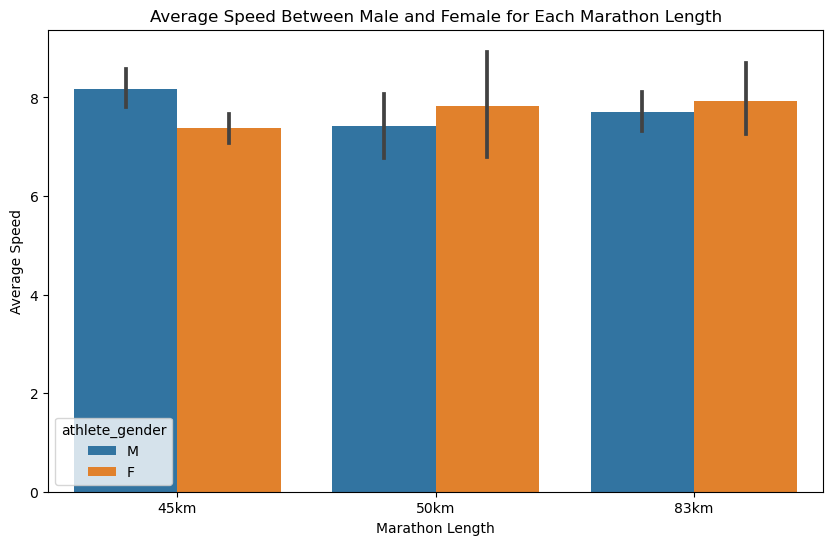

In [144]:
plt.figure(figsize=(10, 6))
sns.barplot(x='marathon_length', y='athlete_average_speed', hue='athlete_gender', data=df, order=['45km', '50km', '83km'])
plt.xlabel('Marathon Length')
plt.ylabel('Average Speed')
plt.title('Average Speed Between Male and Female for Each Marathon Length')
plt.show()


In [145]:
# Q)  what age groups are the best?
df.groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending=False).head(10)

,mean,count
athlete_age,,
25,10.023000,2
28,9.712333,3
29,9.707250,4
36,9.359000,1
34,9.142750,4
38,8.908750,4
43,8.795000,5
39,8.446000,6
31,8.445000,7


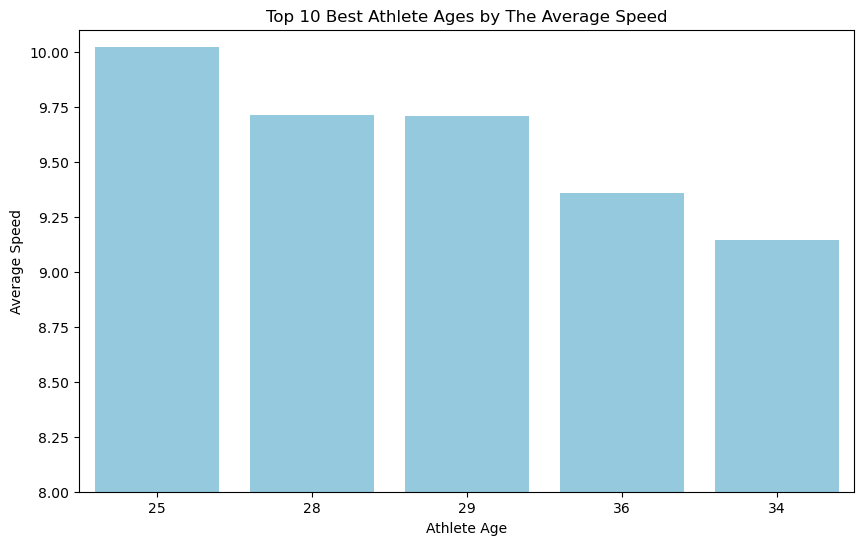

In [146]:
result = df.groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=result.index, y=result['mean'], color='skyblue', order=result.index)
plt.ylim(8, 10.1)
plt.xlabel('Athlete Age')
plt.ylabel('Average Speed')
plt.title('Top 10 Best Athlete Ages by The Average Speed')
plt.show()

In [147]:
# Q)  what age groups are the worst?
df.groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending=True).head(10)

,mean,count
athlete_age,,
58,6.645000,1
23,6.699000,1
60,6.825667,3
61,6.919000,1
54,6.970667,3
78,6.988000,1
47,7.027000,5
26,7.192000,3
52,7.201250,4


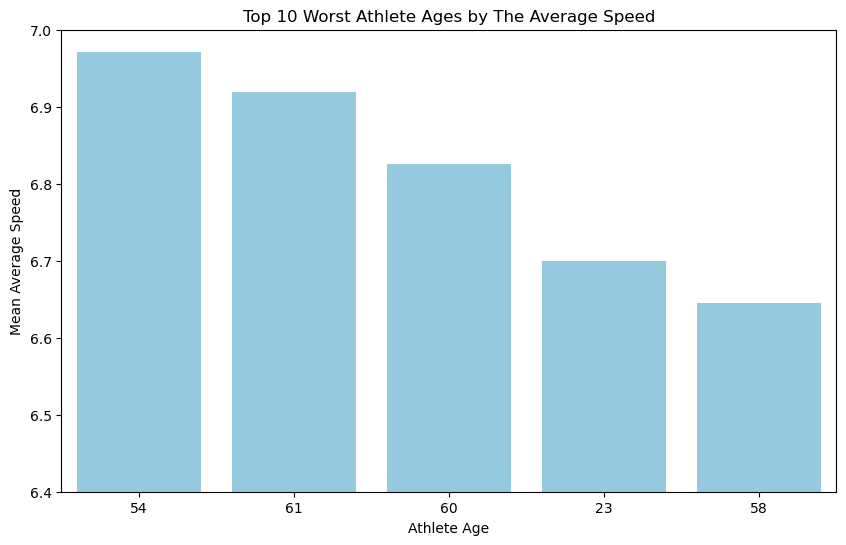

In [148]:
result = df.groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending=False).tail(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=result.index, y=result['mean'], color='skyblue', order=result.index)
plt.ylim(6.4, 7)
plt.xlabel('Athlete Age')
plt.ylabel('Mean Average Speed')
plt.title('Top 10 Worst Athlete Ages by The Average Speed')
plt.show()

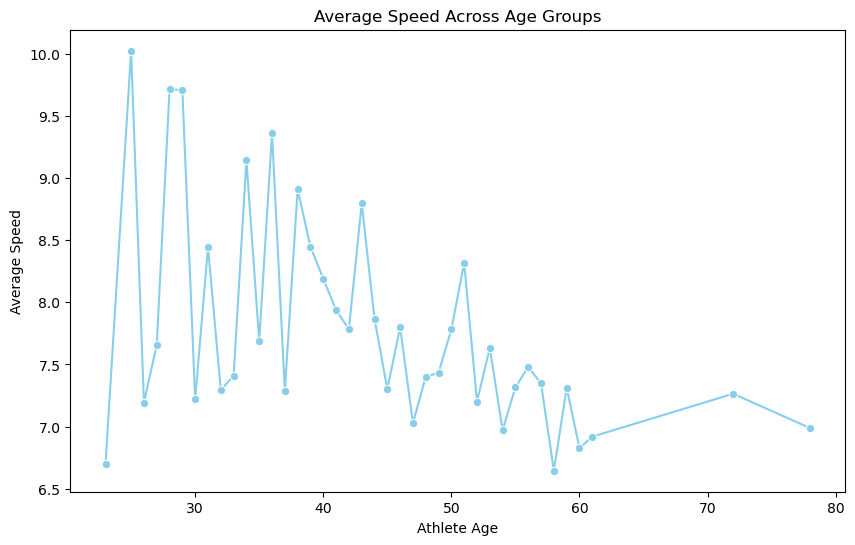

In [149]:
result = df.groupby('athlete_age')['athlete_average_speed'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='athlete_age', y='athlete_average_speed', data=result, marker='o', color='skyblue')
plt.xlabel('Athlete Age')
plt.ylabel('Average Speed')
plt.title('Average Speed Across Age Groups')
plt.show()
